# Importing all required libraries

In [1]:

#For numerical libraries
import numpy as np

#To handle data in the form of rows and columns
import pandas as pd

#importing seaborn for statistical plots
import seaborn as sns

#importing ploting libraries
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import SMOTE library for handling imbalance class
#from imblearn.over_sampling import SMOTE

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 

#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

# Load the dataset

In [2]:
bank_data= pd.read_csv("bank-full.csv")
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bank_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory data quality report

1. Univariate analysis

In [4]:
#To get information of null in columns and total entries per column
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

It gives the data types of each column of the dataset. Most of the columns such as job, marital, education, default, housing, loan, contact, month, poutcome, Target are categorical data types. Here, it is showing object data type. So, we have to convert these to categorical data type.

In [6]:
bank_data['Target']=bank_data.Target.astype('category')
bank_data['job']=bank_data.job.astype('category')
bank_data['marital']=bank_data.marital.astype('category')
bank_data['education']=bank_data.education.astype('category')
bank_data['default']=bank_data.default.astype('category')
bank_data['housing']=bank_data.housing.astype('category')
bank_data['loan']=bank_data.loan.astype('category')
bank_data['contact']=bank_data.contact.astype('category')
bank_data['month']=bank_data.month.astype('category')
bank_data['poutcome']=bank_data.poutcome.astype('category')
bank_data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [7]:
bank_data.shape

(45211, 17)

It shows the shape of the dataset i.e. there are 45211 rows and 17 columns.

In [8]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [9]:
#Analyze the distribution of the dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
bank_data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [11]:
bank_data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.
age, balance are right skewed.

2. Description of independent attributes

#### Age

##### Central Values

In [12]:
print('Minimum age:              ', bank_data['age'].min())
print('Maximum age:              ', bank_data['age'].max())
print('Mean Value:               ', bank_data['age'].mean())
print('Median Value:             ', bank_data['age'].median())
print('Standard deviation Value: ', bank_data['age'].std())
print('Null Values:              ', bank_data['age'].isnull().any())

Minimum age:               18
Maximum age:               95
Mean Value:                40.93621021432837
Median Value:              39.0
Standard deviation Value:  10.618762040975431
Null Values:               False


##### Quartiles

In [13]:
Q1=bank_data['age'].quantile(q=0.25)
Q3=bank_data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  33.0
3st Quartile (Q3) is:  48.0


##### Outlier detection from Interquartile range (IQR)

In [14]:
IQR = Q3 - Q1
print ('IQR is', IQR)
L_outliers=Q1-1.5*IQR #Lower_outlier
U_outliers=Q3+1.5*IQR #Upper Outlier
print('Lower Outlier in Age: ',L_outliers)
print('Upper Outlier in Age: ',U_outliers)

IQR is 15.0
Lower Outlier in Age:  10.5
Upper Outlier in Age:  70.5


In [15]:
print('Number of outliers in Age upper : ', bank_data[bank_data['age']>U_outliers]['age'].count())
print('Number of outliers in Age lower : ', bank_data[bank_data['age']<L_outliers]['age'].count())
print('% of Outlier in Age upper: ', round(bank_data[bank_data['age']>U_outliers]['age'].count()*100/len(bank_data)),'%')
print('% of Outlier in Age lower: ', round(bank_data[bank_data['age']<L_outliers]['age'].count()*100/len(bank_data)),'%')

Number of outliers in Age upper :  487
Number of outliers in Age lower :  0
% of Outlier in Age upper:  1.0 %
% of Outlier in Age lower:  0.0 %


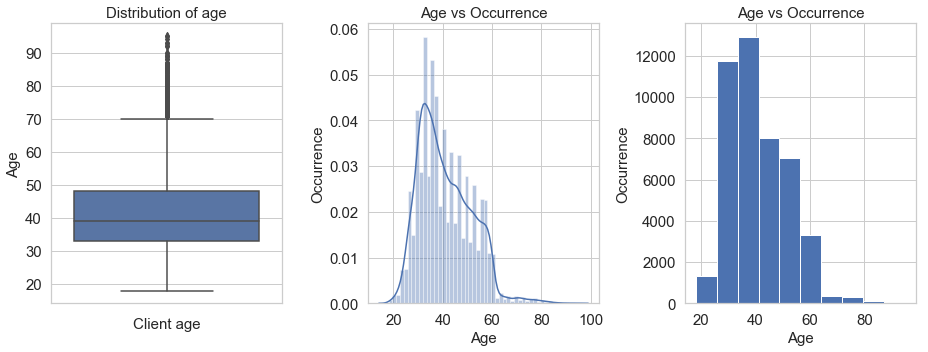

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Age vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


    1.We have clients with all the ages (minimum age 18 to maximum age 95).
    2.Mean and median have very less diference.
    3.age attribute does not have any missing values.
    4.age is right skewed. As more number of data points are present on right tail. The boxplot, distplot and histogram is also showing the same.

#### Job

In [17]:
print('Jobs: \n', bank_data['job'].unique())

Jobs: 
 [management, technician, entrepreneur, blue-collar, unknown, ..., services, self-employed, unemployed, housemaid, student]
Length: 12
Categories (12, object): [management, technician, entrepreneur, blue-collar, ..., self-employed, unemployed, housemaid, student]


In [18]:
bank_data.groupby('job').size()


job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

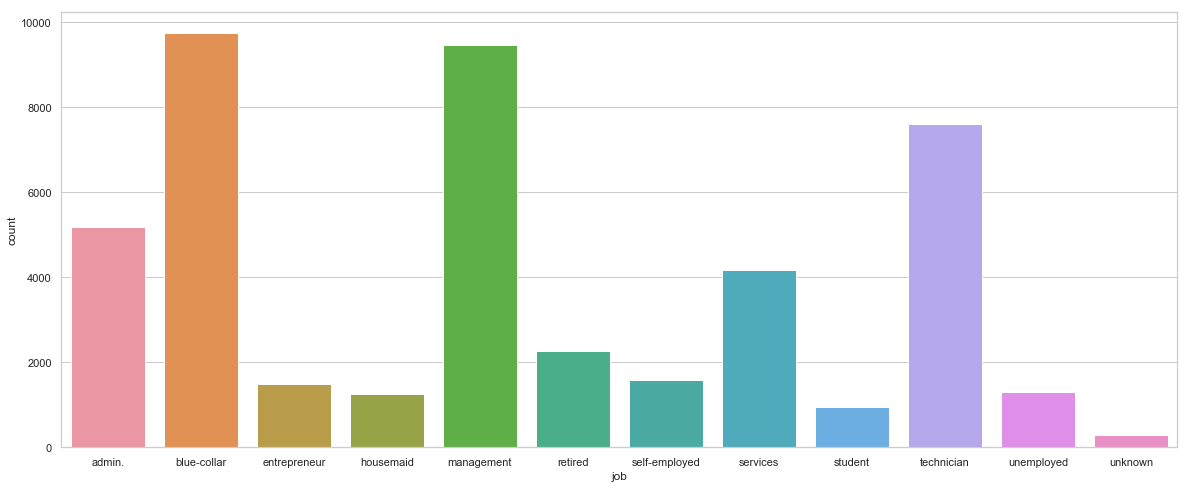

In [19]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(bank_data['job'],data=bank_data)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

In [20]:
bank_data['job']=np.where(bank_data['job']=='blue-collar','worker',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='housemaid','worker',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='management','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='services','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='admin','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='enterpreneur','managerial',bank_data['job'])

bank_data['job'].unique()

array(['managerial', 'technician', 'entrepreneur', 'worker', 'unknown',
       'retired', 'admin.', 'self-employed', 'unemployed', 'student'],
      dtype=object)


    1. Job attribute shows the clients job information.
    2.It also shows that there are some unknown values. We do not know about the jobs of some clients. It indicates the missing values.
    3.Countplot shows that blue-collar, management, and technician clients have more subscriptions than the other clients.

#### Marital

In [21]:
print('Marital: \n', bank_data['marital'].unique())

Marital: 
 [married, single, divorced]
Categories (3, object): [married, single, divorced]


In [22]:
bank_data.groupby('marital').size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

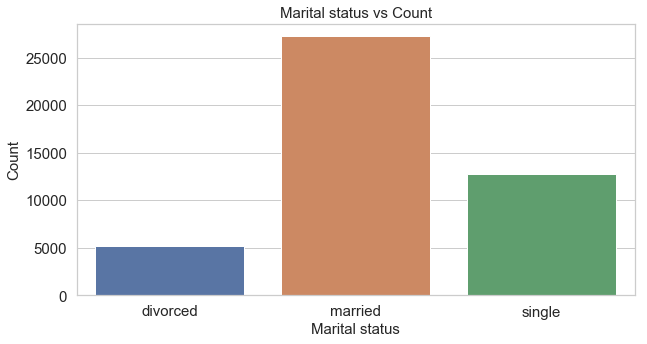

In [23]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['marital'],data=bank_data)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status vs Count', fontsize=15)
ax.tick_params(labelsize=15)

    It shows that married people are taking more subscriptions than the other people.

#### Education

In [24]:
print('Education: \n', bank_data['education'].unique())

Education: 
 [tertiary, secondary, unknown, primary]
Categories (4, object): [tertiary, secondary, unknown, primary]


In [25]:
bank_data.groupby('education').size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

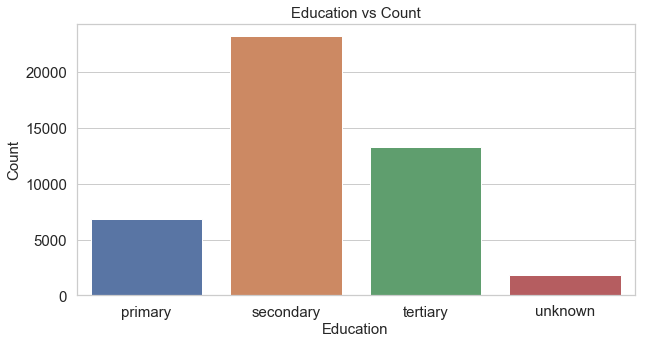

In [26]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['education'],data=bank_data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

#### Default, Housing, Loan

In [27]:
print('Default: \n', bank_data['default'].unique())
print('Housing: \n', bank_data['housing'].unique())
print('Loan: \n', bank_data['loan'].unique())

Default: 
 [no, yes]
Categories (2, object): [no, yes]
Housing: 
 [yes, no]
Categories (2, object): [yes, no]
Loan: 
 [no, yes]
Categories (2, object): [no, yes]


In [28]:
print(bank_data.groupby('default').size())

default
no     44396
yes      815
dtype: int64


In [29]:
bank_data.groupby('housing').size()

housing
no     20081
yes    25130
dtype: int64

In [30]:
bank_data.groupby('loan').size()

loan
no     37967
yes     7244
dtype: int64

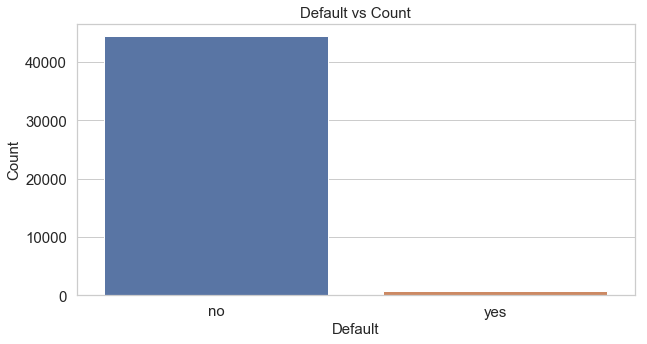

In [31]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['default'],data=bank_data)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default vs Count', fontsize=15)
ax.tick_params(labelsize=15)

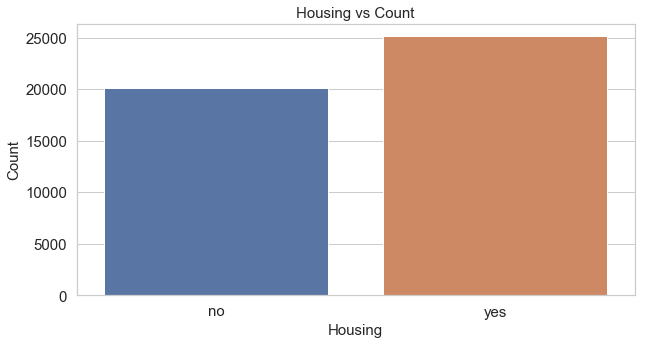

In [32]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['housing'],data=bank_data)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)

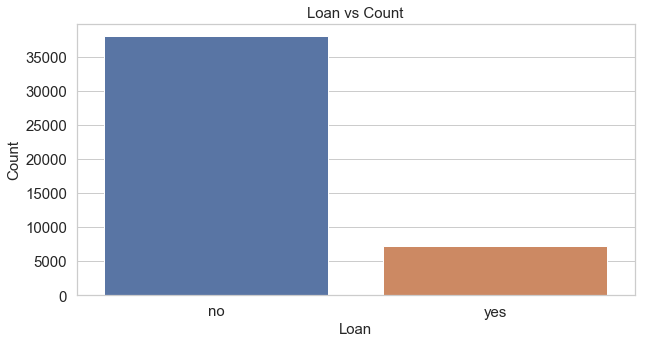

In [33]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['loan'],data=bank_data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

#### Balance

In [34]:
#Central Values
print('Minimum balance: ', bank_data['balance'].min())
print('Maximum balance: ',bank_data['balance'].max())
print('Mean value: ', bank_data['balance'].mean())
print('Median value: ',bank_data['balance'].median())
print('Standard deviation: ', bank_data['balance'].std())
print('Null values: ',bank_data['balance'].isnull().any())

Minimum balance:  -8019
Maximum balance:  102127
Mean value:  1362.2720576850766
Median value:  448.0
Standard deviation:  3044.7658291686002
Null values:  False


In [35]:
#Quartiles
Q1=bank_data['balance'].quantile(q=0.25)
Q3=bank_data['balance'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  72.0
3st Quartile (Q3) is:  1428.0


In [36]:
#Outlier detection from Interquartile range (IQR)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', L_outliers)
print('Upper outliers in Balance: ', U_outliers)

Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0


In [37]:
print('Number of outliers in Balance upper : ', bank_data[bank_data['balance']>643]['balance'].count())
print('Number of outliers in Balance lower : ', bank_data[bank_data['balance']<-221]['balance'].count())
print('% of Outlier in Balance upper: ',round(bank_data[bank_data['balance']>643]['balance'].count()*100/len(bank_data)), '%')
print('% of Outlier in Balancee lower: ',round(bank_data[bank_data['balance']<-221]['balance'].count()*100/len(bank_data)), '%')


Number of outliers in Balance upper :  18980
Number of outliers in Balance lower :  1922
% of Outlier in Balance upper:  42.0 %
% of Outlier in Balancee lower:  4.0 %


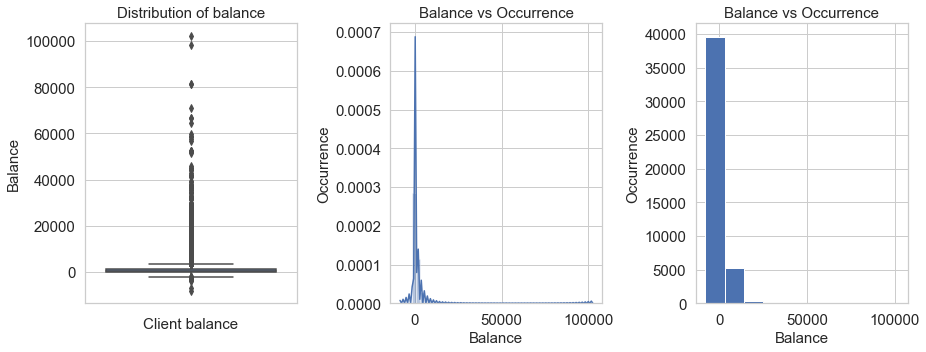

In [38]:

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['balance'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

    1.Mean and median are different.
    2.balance is right skewed. As more number of data points are present on right tail. The boxplot, distplot and histogram is also showing the same.
    3.balance attribute does not have any missing values

#### Contact

In [39]:
print('Contact: \n', bank_data['contact'].unique())

Contact: 
 [unknown, cellular, telephone]
Categories (3, object): [unknown, cellular, telephone]


In [40]:
bank_data.groupby('contact').size()

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

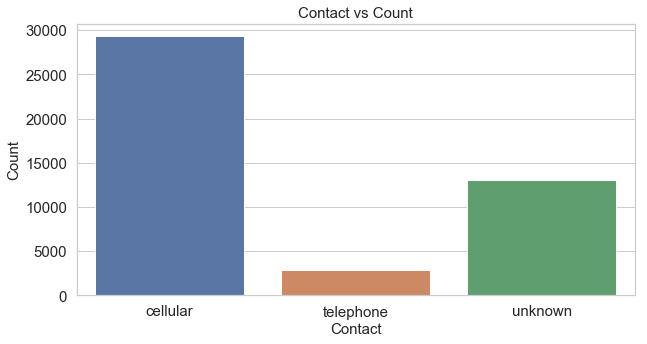

In [41]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['contact'],data=bank_data)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact vs Count', fontsize=15)
ax.tick_params(labelsize=15)

#### Day, Month

In [42]:
print('Day: \n', bank_data['loan'].unique())
print('Month: \n', bank_data['loan'].unique())

Day: 
 [no, yes]
Categories (2, object): [no, yes]
Month: 
 [no, yes]
Categories (2, object): [no, yes]


In [43]:
print('Count values in Day: \n',bank_data.groupby('loan').size())
print('Count values in Month: \n', bank_data.groupby('loan').size())

Count values in Day: 
 loan
no     37967
yes     7244
dtype: int64
Count values in Month: 
 loan
no     37967
yes     7244
dtype: int64


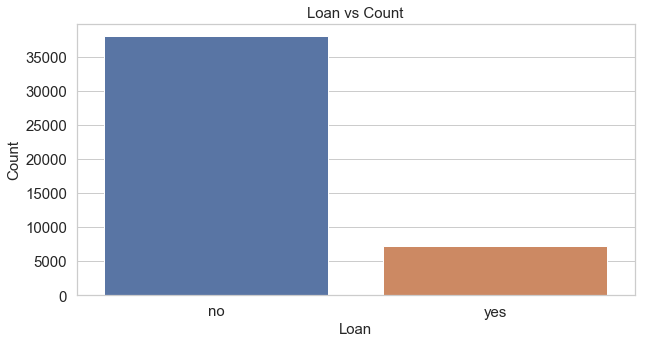

In [44]:

fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['loan'],data=bank_data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

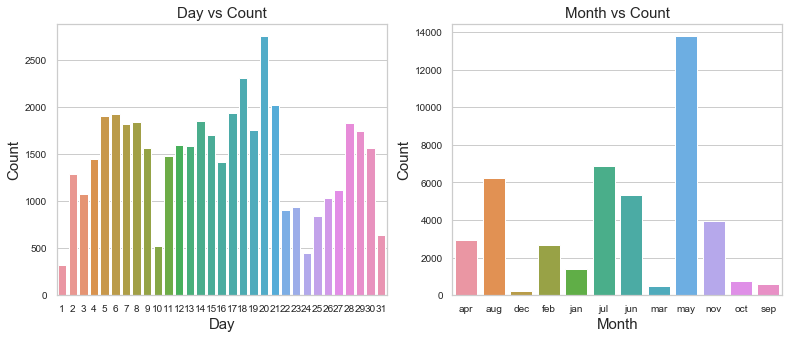

In [45]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#countplot
sns.countplot(bank_data['day'],data=bank_data,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)

sns.countplot(bank_data['month'],data=bank_data,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

#### Duration

In [46]:
#central Values
print('Minimum duration calls in seconds: ', bank_data['duration'].min())
print('Maximum duration calls in seconds: ',bank_data['duration'].max())
print('Mean duration calls in seconds: ', bank_data['duration'].mean())
print('Median duration calls in seconds: ',bank_data['duration'].median())
print('Standard deviation: ', bank_data['duration'].std())
print('Null values: ',bank_data['duration'].isnull().any())

Minimum duration calls in seconds:  0
Maximum duration calls in seconds:  4918
Mean duration calls in seconds:  258.1630797814691
Median duration calls in seconds:  180.0
Standard deviation:  257.52781226517095
Null values:  False


In [47]:
#Quartiles
Q1=bank_data['duration'].quantile(q=0.25)
Q3=bank_data['duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  319.0


In [48]:
#Outlier detection from Interquartile range (IQR)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -221.0
Upper outliers in Duration:  643.0


In [49]:
print('Number of outliers in Duration upper : ', bank_data[bank_data['duration']>643]['duration'].count())
print('Number of outliers in Balance lower : ', bank_data[bank_data['duration']<-221]['duration'].count())
print('% of Outlier in Duration upper: ',round(bank_data[bank_data['duration']>643]['duration'].count()*100/len(bank_data)), '%')
print('% of Outlier in Duration lower: ',round(bank_data[bank_data['duration']<-221]['duration'].count()*100/len(bank_data)), '%')

Number of outliers in Duration upper :  3235
Number of outliers in Balance lower :  0
% of Outlier in Duration upper:  7.0 %
% of Outlier in Duration lower:  0.0 %


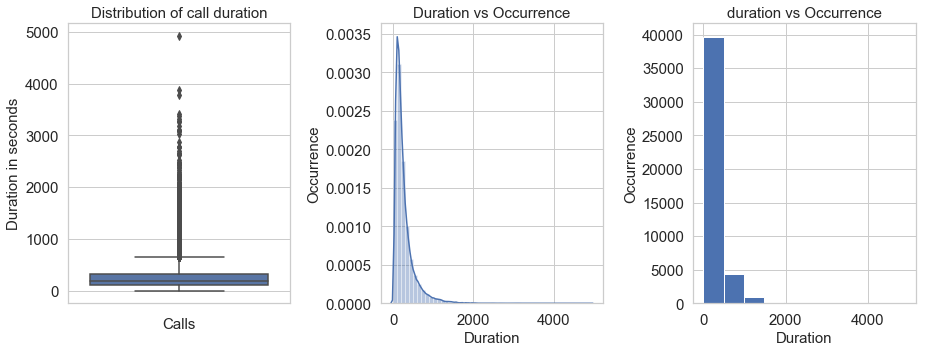

In [50]:

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration in seconds', fontsize=15)
ax1.set_title('Distribution of call duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('duration vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### poutcome

In [51]:
print('Poutcome: \n', bank_data['poutcome'].unique())

Poutcome: 
 [unknown, failure, other, success]
Categories (4, object): [unknown, failure, other, success]


In [52]:
print(bank_data.groupby('poutcome').size())

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


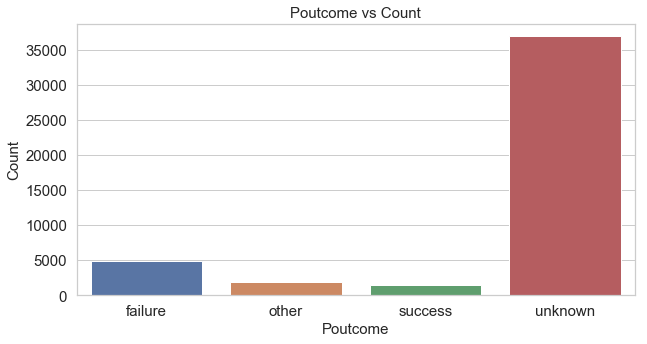

In [53]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['poutcome'],data=bank_data)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Dependent attribute

#### Target

In [54]:
print('Target: \n', bank_data['Target'].unique())

Target: 
 [no, yes]
Categories (2, object): [no, yes]


In [55]:
print(bank_data.groupby('Target').size())

Target
no     39922
yes     5289
dtype: int64


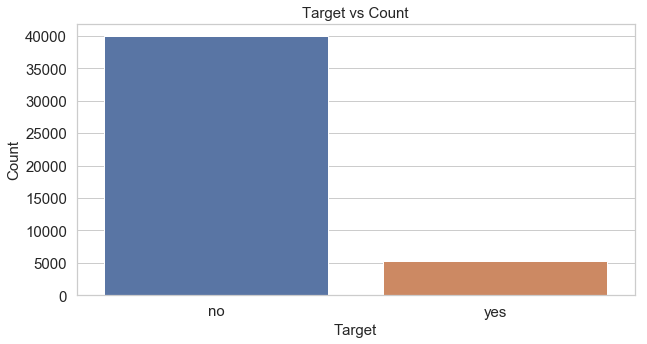

In [56]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Target'],data=bank_data)
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target vs Count', fontsize=15)
ax.tick_params(labelsize=15)

Highly imbalance Target column as there are 39922 customers who do not have subscribed the term deposit and there are only 5289 customers who have subscribed the term deposit.

### Encode the categorical varibles

In [57]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()
bank_data['job']=labelencoder_X.fit_transform(bank_data['job'])
bank_data['marital']=labelencoder_X.fit_transform(bank_data['marital'])
bank_data['education']=labelencoder_X.fit_transform(bank_data['education'])
bank_data['default']=labelencoder_X.fit_transform(bank_data['default'])
bank_data['housing']=labelencoder_X.fit_transform(bank_data['housing'])
bank_data['loan']=labelencoder_X.fit_transform(bank_data['loan'])
bank_data['contact']= labelencoder_X.fit_transform(bank_data['contact']) 
bank_data['month']= labelencoder_X.fit_transform(bank_data['month']) 
bank_data['poutcome'] = labelencoder_X.fit_transform(bank_data['poutcome'])
bank_data['Target'] = labelencoder_X.fit_transform(bank_data['Target'])

In [58]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,6,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,9,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,8,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [59]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,6,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,3,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,3,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,9,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,1,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [60]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.473779,3.205847,0.0,2.0,4.0,7.0,9.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


## Multivariate Analysis

### Visualization

In [61]:
# corrlation matrix 
cor=bank_data.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.019980,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.019980,1.000000,-0.012009,-0.320070,0.006475,-0.036583,0.066957,-0.015011,0.094748,-0.007327,0.015160,0.010794,0.015967,-0.007486,-0.023964,0.023881,-0.053212
marital,-0.403240,-0.012009,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,-0.320070,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,0.006475,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,-0.036583,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,0.066957,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.015011,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,0.094748,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,-0.007327,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


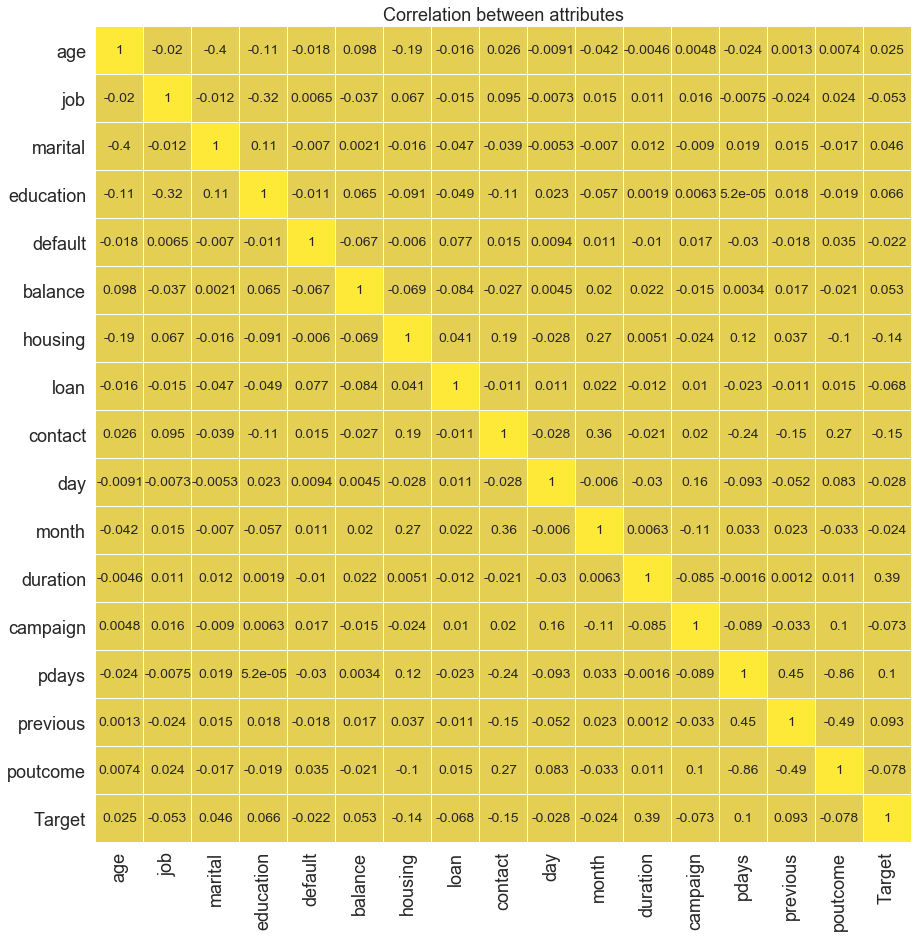

In [62]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='cividis', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

In [ ]:

sns.pairplot(bank_data,hue='Target')

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


### Analysis of Continous attributes ( Age, balance) vs Categorical attribute (Target)

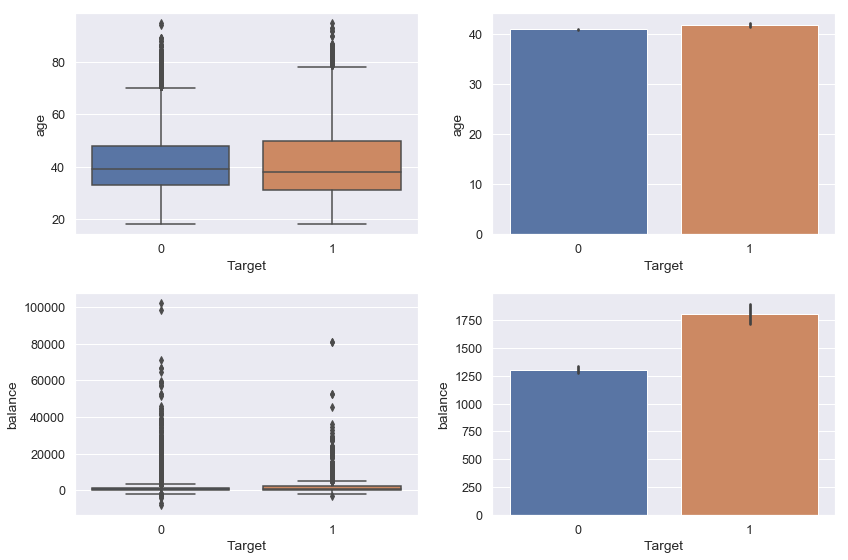

In [63]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
# Categorical vs Continuous ----Target vs Age
#boxplot
sns.boxplot(x="Target", y="age", data=bank_data,ax=ax[0][0])

#barplot
sns.barplot(x="Target", y="age", data=bank_data,ax=ax[0][1])


# Categorical vs Continuous ----Target vs balance
#boxplot
sns.boxplot(x="Target", y="balance", data=bank_data,ax=ax[1][0])


#barplot
sns.barplot(x="Target", y="balance", data=bank_data,ax=ax[1][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

AttributeError: module 'matplotlib.pyplot' has no attribute 'layout'

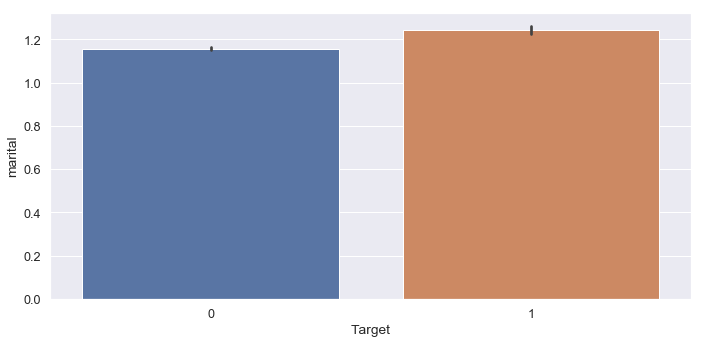

In [64]:
# Categorical vs Categorical ----Target vs marital
fig, ax1=plt.subplots(1,1,figsize=(10,5))

#barplot
sns.barplot(x="Target", y="marital", data=bank_data,ax=ax1)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.layout()

# Model Building

### Splitting the data

In [65]:
#independent and dependent variables
X=bank_data.loc[:,bank_data.columns!='Target']
y=bank_data.loc[:,bank_data.columns=='Target']

In [66]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

#### 1. Decision Tree Model

In [67]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option                             
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )
#Fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

##### Visualizing the Tree

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz
bank_df=bank_data
xvar = bank_df.drop('Target', axis=1)
feature_cols = xvar.columns

In [71]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_data.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [73]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.090699
job        0.036185
marital    0.019029
education  0.022046
default    0.000869
balance    0.102435
housing    0.027805
loan       0.007143
contact    0.056033
day        0.086493
month      0.103351
duration   0.310855
campaign   0.032524
pdays      0.057438
previous   0.016822
poutcome   0.030273


In [74]:
#Making the prediction
y_predict = dt_model.predict(X_test)

In [75]:
# performance on train data
print('Performance on Training data using DT: ',dt_model.score(X_train , y_train))
# performance on test data
print('Performance on Testing data using DT: ',dt_model.score(X_test , y_test))

Performance on Training data using DT:  1.0
Performance on Testing data using DT:  0.8754792096726629


There is a overfitting in the model as the dataset is performing 100% accurately in trainnig data. However, the accuracy of the testing data drops.

In [85]:
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_DT=metrics.accuracy_score(y_test, y_predict)
print('Accuracy DT: ',acc_DT)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report DT: \n',metrics.classification_report(y_test, y_predict))

Accuracy DT:  0.9026835741669124
Confusion Matrix DT: 
 [[11570   399]
 [  921   674]]
Classification report DT: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11969
           1       0.63      0.42      0.51      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.69      0.73     13564
weighted avg       0.89      0.90      0.89     13564



So using Decision Tree Model, we got accuracy of 11854/13564 = 87% and 13% as misclassification error.

In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.902684


### Regularising/Pruning of Decision Tree

In [89]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7,random_state=100,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [90]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.090699
job        0.036185
marital    0.019029
education  0.022046
default    0.000869
balance    0.102435
housing    0.027805
loan       0.007143
contact    0.056033
day        0.086493
month      0.103351
duration   0.310855
campaign   0.032524
pdays      0.057438
previous   0.016822
poutcome   0.030273


In [91]:
y_predict = reg_dt_model.predict(X_test)

In [92]:
# performance on train data
print('Performance on Training data using  Pruned DT: ',reg_dt_model.score(X_train , y_train))
# performance on test data
print('Performance on Testing data using  Pruned DT: ',reg_dt_model.score(X_test , y_test))

Performance on Training data using  Pruned DT:  0.9089013176604418
Performance on Testing data using  Pruned DT:  0.8960483633146564


The Pruned DT model is perfroming well in both training and testing data.

In [93]:
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_pruned_DT=metrics.accuracy_score(y_test, y_predict)
print("Accuracy Pruned DT:",acc_pruned_DT)
print('Confusion Matrix Pruned DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report Pruned DT: \n',metrics.classification_report(y_test, y_predict))

Accuracy Pruned DT: 0.8960483633146564
Confusion Matrix Pruned DT: 
 [[11410   559]
 [  851   744]]
Classification report Pruned DT: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11969
           1       0.57      0.47      0.51      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.75      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     13564



In [94]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_pruned_DT]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.902684
2,Random Forest,0.902684
2,Pruned Decision Tree,0.896048


### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(X_train, y_train)

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
y_predict = rfcl.predict(X_test)
acc_RF=metrics.accuracy_score(y_test , y_predict)
print('Accuracy using Random forest: ',acc_RF)
print('Confusion Matrix Random Forest: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using Random forest:  0.9026835741669124
Confusion Matrix Random Forest: 
 [[11570   399]
 [  921   674]]


In [95]:

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.902684
2,Random Forest,0.902684
2,Pruned Decision Tree,0.896048
3,Random Forest,0.902684


Compared to the decision tree, we can see that the accuracy is same for decision tree and Random forest model.

ALl these models giving the highest accuracy. But these models will be biased towards the customers who do not have subscribed term deposit as there are 39922 customers who do not have subscribed term deposit. There are only 5289 customers who have subscribed term deposit. So, these models are biased.

## Model Building: normalizing the columns


In [97]:
#independent and dependent variables
bank_new=bank_data
X=bank_new.loc[:,bank_new.columns!='Target']
y=bank_new.loc[:,bank_new.columns=='Target']


In [98]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

In [99]:
#for normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
